𝑥_𝑖 (𝑡),𝑥_𝑗 (𝑡) ∈ [0,1]  Opinions of individuum 𝑥_𝑖 and its neighbors
𝑥_𝑖𝑗 (𝑡) = 𝑥_𝑗 (𝑡) - 𝑥_𝑖 (𝑡)  ∈ [-1,1]  difference of opinion
𝑤_𝑖𝑗 ∈ [0,1]  social influence parameter (edge weights, allows unsymmetrical influence)
𝛼_𝑖 ∈ [0,+…]  controversy  of the topic (nonlinearity parameter,)
𝜌_𝑖 ∈ [0,1]  max opinion difference before repulsion
𝛽_𝑖  coupling strength (stubborn agents)


In [46]:
import networkx as nx
import matplotlib.pyplot as plt

import numpy as np
import random
class Environment:
    def __init__(self):
        self.graph = nx.Graph()  # Undirected graph

    def add_agent(self, agent):
        """Add an agent as a node in the graph."""
        self.graph.add_node(agent.id, agent=agent)

    def add_connection(self, agent1_id, agent2_id, weight=1):
        """Add a connection (edge) between two agents with a weight."""
        self.graph.add_edge(agent1_id, agent2_id, weight=weight)    


In [47]:
class Agent:
    def __init__(self, agent_id):
        self.agent_id = agent_id
        self.opinion = None
        self.beta =  None #coupling_strength
        self.rho = None #threshold of opiniondifferences
        self.alpha = None #controversity of the topic



    #def opinionupdate (self)

    def step(self, environment):
        # Calculate the opinion of the agent
        neighbors = environment.graph.neighbors(self.agent_id)  # Get neighbors of the agent
        #neighbor_opinions = [environment.graph.nodes[neighbor]['agent'].opinion for neighbor in neighbors] # Get opinions of neighbors
        weights = [environment.graph[self.agent_id][neighbor]['weight'] for neighbor in environment.graph.neighbors(self.agent_id)]
        opinion_fraction = 0.00
   
        for number, neighbor in enumerate(neighbors):
            neighbor_agent = environment.graph.nodes[neighbor]['agent']
            weight = environment.graph[self.agent_id][neighbor].get('weight', 1)  # Default weight is 1
            #influence = math.tanh(-neighbor_agent.a * (abs(neighbor_agent.opinion) - neighbor_agent.p))
            opinion_diff = neighbor_agent.opinion - self.opinion
            opinion_fraction += weight * self.opinion * np.tanh(- self.alpha * (abs(opinion_diff) - self.rho)) 
            
        
        if weights:  # Avoid division by zero
            self.opinion += self.beta / sum(weights) * opinion_fraction
            
        

In [48]:
class Model:
    def __init__(self, num_agents, connection_probability):
        self.environment = Environment()
        self.agents = []

        # Create agents and add them to the graph
        for i in range(num_agents):
            agent = Agent(i)
            agent.opinion = random.uniform(0, 1)  # Initial opinion
            agent.beta =  1 #coupling_strength
            agent.rho = 0.5 + random.uniform(0, 0.2) #threshold of opiniondifferences
            agent.alpha = 0.7 + random.uniform(0, 0.2) #controversity of the topic positiv definit
            self.agents.append(agent)
            self.environment.graph.add_node(i, agent=agent)

        # Add edges randomly between nodes
        for i in range(num_agents):
            for j in range(i + 1, num_agents):
                if random.random() < connection_probability:
                    weight = random.uniform(0.1, 1.0)  # Assign a random weight
                    self.environment.graph.add_edge(i, j, weight=weight)

    def step(self):
        for agent in self.agents:
            agent.step(self.environment)

In [53]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_network(environment):
    # Extract opinions for node colors
    node_colors = [environment.graph.nodes[node]['agent'].opinion for node in environment.graph.nodes]

    # Normalize node colors to match colormap range
    norm = plt.Normalize(vmin=min(node_colors), vmax=max(node_colors))
    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))

    # Draw the network with normalized node colors
    nx.draw(
        environment.graph,
        with_labels=True,
        node_color=[sm.to_rgba(opinion) for opinion in node_colors],
        cmap="coolwarm",
        ax=ax  # Associate the drawing with the axis
    )

    # Add the colorbar for the node opinions
    sm.set_array([])  # Required for colorbar
    fig.colorbar(sm, ax=ax, label="Opinion")  # Explicitly associate with the axis
    plt.show()


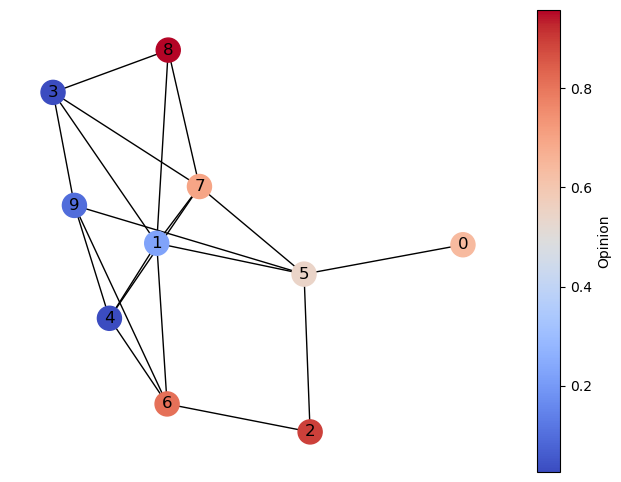

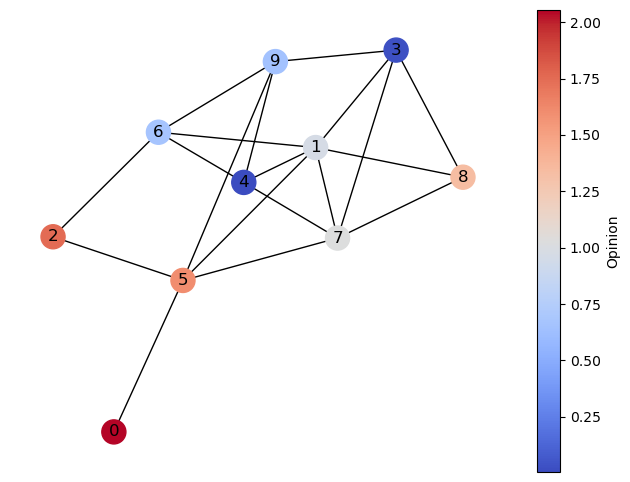

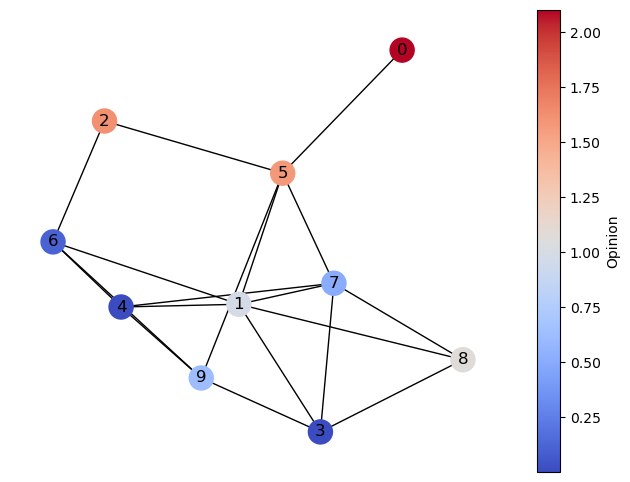

In [56]:
# Initialize the model
num_agents = 10
connection_probability = 0.4
random.seed(42)
model = Model(num_agents, connection_probability)
visualize_network(model.environment)
#random.seed(42)
# Run the simulation
num_steps = 10
for step in range(num_steps):
    #print(f"Step {step}")
    #for agent in model.agents:
        #print(f"Agent {agent.agent_id}: Opinion {agent.opinion}")
    model.step()
visualize_network(model.environment)
num_steps = 10
for step in range(num_steps):
    #print(f"Step {step}")
    #for agent in model.agents:
        #print(f"Agent {agent.agent_id}: Opinion {agent.opinion}")
    model.step()
visualize_network(model.environment)